In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [3]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [4]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

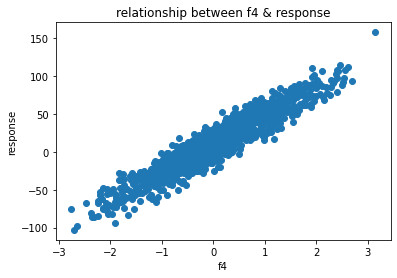

In [5]:
# let's plot f4 & response, cuz f4 corr value is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

In [6]:
# Redefine each column to be processed
columns = ['f1','f2','f3','f4','f5','response']
dt = dt.loc[:, columns]
dt.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [7]:
# Splitting the training and test set with the ratio of 8:2

from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5'] # Data that we want to utilize as training & test
#X = dt.loc[:, features] # X are the data we want to use from 'features' = independent variable
#y = dt.loc[:, ['response']] # y is the data we want to use as target = dependent variable

X_data = np.array(dt.iloc[:,4])
y_data = np.array(dt.iloc[:,-1])

#X = dt[['f1','f2','f3','f4','f5']]
#y = dt['response']
#y = np.array((y-y.mean())/y.std())
#X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, train_size=0.8)

In [8]:
print(X_test)
#print(y)

[ 3.43233578e-01  1.29708222e-01 -5.05474951e-01 -1.45673015e+00
 -2.87227313e-01  1.02388856e+00 -6.30259835e-01  6.47133487e-01
 -4.51004082e-01 -1.25182980e+00 -5.37871808e-01 -8.54856516e-01
  9.53672927e-01  1.14084691e+00 -1.24760250e-01  8.44818951e-01
  2.80146667e-01 -1.45314479e+00  1.59063828e-01  1.37371403e+00
 -2.21643200e-01 -1.12204740e+00  6.34058371e-01  2.10690554e+00
  1.01310187e+00 -6.50705320e-01  5.65847620e-01  1.15138314e+00
 -1.33014896e+00  5.59302961e-01 -1.58885135e+00 -8.00119911e-01
  5.19013886e-01  1.19656250e+00 -1.77125048e+00 -2.20357270e-02
 -7.91072058e-01  5.66733883e-01 -7.44129727e-01  7.47275491e-01
  9.14018250e-01 -2.16927780e+00  1.20780102e+00 -8.26788157e-01
 -6.40783958e-01 -6.01851880e-02 -3.46261000e-04  7.99828126e-01
 -5.44331315e-01  6.58181930e-02  9.77098785e-01  1.16675177e+00
  9.54000000e-05 -1.01367488e+00  6.21544516e-01 -8.46025188e-01
 -2.73838080e-02  8.55309243e-01  2.60936170e-01 -3.90571000e-04
  1.50731816e+00  4.88832

In [9]:
alpha = 0.1 # Set learning rate to 0.1
max_epoch = 1500 # Set max iteration to 1000

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800,) (800,)
(200,) (200,)


In [11]:
def loss_fn(y, yhat):
    loss = np.sum((y-yhat)**2)/len(y)
    return loss
    #loss = mean_squared_error(y, yhat)
    #return loss

In [12]:
def train_model(X, y, alpha, max_epoch):
    w = b = 0
    n = len(X)
    losses = []
    weights = []

    def prediction(w, X):
            yhat = (w * X) + b
            return yhat;

    for i in range(max_epoch):
        y_predict = prediction(w, X)
        loss = loss_fn(y, y_predict)

        losses.append(loss)
        weights.append(w)

        loss_fn(y, y_predict)

        wd = -(2/n)*sum(X*(y-y_predict))
        bd = -(2/n)*sum(y-y_predict)

        w = w - alpha * wd
        b = b - alpha * bd

        print(f"Iteration {i+1}: Loss {loss}, Weight {w}, Bias {b}");
    plt.figure(figsize=(8,6))
    plt.plot(weights, losses)
    plt.scatter(weights, losses, marker='o', color='red')
    plt.title("Loss vs Weights")
    plt.ylabel("Loss")
    plt.xlabel("Weight")
    plt.show()

    return w, b

Iteration 1: Loss 1721.3069867699319, Weight -0.20427783377291586, Bias 2.4463995536742518
Iteration 2: Loss 1667.0651748347786, Weight -0.368581914746362, Bias 4.403642592126182
Iteration 3: Loss 1632.3434607882796, Weight -0.5007281326604676, Bias 5.969536271963891
Iteration 4: Loss 1610.1170947995126, Weight -0.6070054786864416, Bias 7.222331039718946
Iteration 5: Loss 1595.8893488516874, Weight -0.6924740662765135, Bias 8.224631051527505
Iteration 6: Loss 1586.7817462015198, Weight -0.7612050405279487, Bias 9.026522688896852
Iteration 7: Loss 1580.9516948796704, Weight -0.8164736955755654, Bias 9.668077516237656
Iteration 8: Loss 1577.219700264532, Weight -0.8609149170429552, Bias 10.181354763543707
Iteration 9: Loss 1574.8307342913547, Weight -0.8966482921364797, Bias 10.592003406431886
Iteration 10: Loss 1573.301481640302, Weight -0.9253788004776791, Bias 10.920543905747774
Iteration 11: Loss 1572.3225579468633, Weight -0.9484778472621747, Bias 11.183393660073191
Iteration 12: Lo

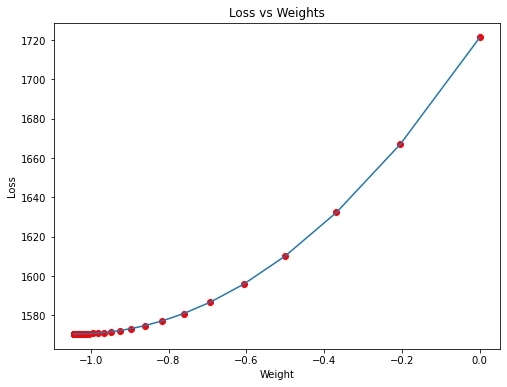

Estimated Weight: -1.0431269488862978
Estimated Bias: 12.235148310505833


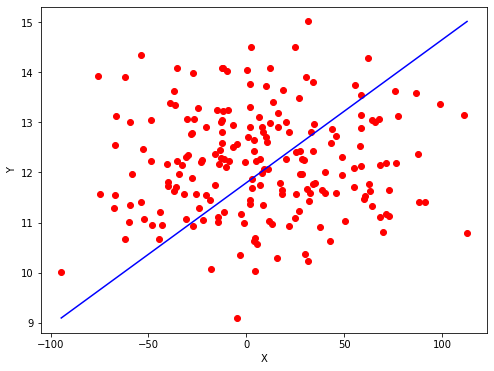

In [13]:
est_weight, est_bias = train_model(X_train, y_train, alpha, max_epoch)
print(f"Estimated Weight: {est_weight}\nEstimated Bias: {est_bias}")
y_pred = (est_weight*X_test) + est_bias
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred, marker='o', color='red')

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='blue', label="line1")
#plt.plot(y_test, y_test, color='orange', label="line2", linestyle="--")

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

33.841913305022075
1719.2467180299154
-0.013453292642622738
